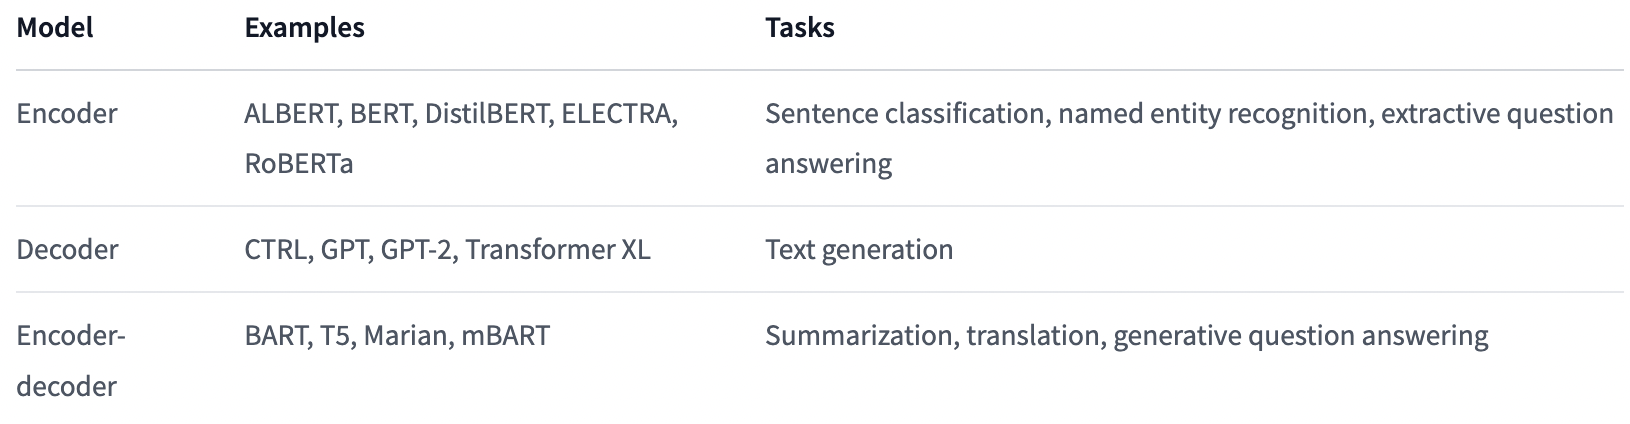

In [49]:
# Chapter 2: 
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn as nn
import torch.nn.functional as F

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt") 

model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
results = model(**inputs)
print(results)
print(model.config.id2label)
F.softmax(results.logits).argmax(dim=1)

SequenceClassifierOutput(loss=None, logits=tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
{0: 'NEGATIVE', 1: 'POSITIVE'}


/var/folders/2c/bnxpy2zd5tg51llb27r91_dw0000gn/T/ipykernel_61663/2120577551.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(results.logits).argmax(dim=1)


tensor([1, 0])

In [50]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

In [51]:
model.save_pretrained("./checkpoints/bert-base-cased/")

In [52]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [54]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [55]:
tokenizer.save_pretrained("./checkpoints/bert-base-cased/")

('./checkpoints/bert-base-cased/tokenizer_config.json',
 './checkpoints/bert-base-cased/special_tokens_map.json',
 './checkpoints/bert-base-cased/vocab.txt',
 './checkpoints/bert-base-cased/added_tokens.json')

In [62]:
tokenizer.tokenize("Using a Transformer network is simple")

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']

In [63]:
tokenizer.convert_tokens_to_ids(['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple'])

[7993, 170, 13809, 23763, 2443, 1110, 3014]

In [66]:
tokenizer.decode([7993, 170, 13809, 23763, 2443, 1110, 3014])

'Using a Transformer network is simple'

In [13]:
import torch 
from transformers import AutoTokenizer,AutoModelForSequenceClassification
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)


In [34]:
sequence = "I've been waiting for a HuggingFace course my whole life."


In [35]:
tokenizer(sequence,return_tensors='pt')

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [38]:
tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)
input_ids = torch.tensor([ids])
model(input_ids)

[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]


SequenceClassifierOutput(loss=None, logits=tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [39]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)

In [40]:
## FINE-TUNING A PRETRAINED MODEL

In [4]:
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

# Same as before
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
batch["labels"] = torch.tensor([1, 1])
optimizer = AdamW(model.parameters())

/Users/pranavjha/Library/Caches/pypoetry/virtualenvs/applied-deeplearning-UPsxMYgd-py3.10/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [6]:
loss = model(**batch).loss
loss.backward()
optimizer.step()

In [7]:
print(model.config.id2label)
model(**tokenizer("I am a good person",return_tensors="pt")).logits

{0: 'LABEL_0', 1: 'LABEL_1'}


tensor([[-0.5142,  0.9502]], grad_fn=<AddmmBackward0>)

In [8]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

In [9]:
train_set = raw_datasets['train']

In [12]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

In [13]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)



In [14]:
from transformers import Trainer
from transformers import TrainingArguments

training_args = TrainingArguments("./checkpoints/")
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [15]:
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.570900
1000,0.364200


TrainOutput(global_step=1377, training_loss=0.4051309501077268, metrics={'train_runtime': 3817.0356, 'train_samples_per_second': 2.883, 'train_steps_per_second': 0.361, 'total_flos': 405324636337200.0, 'train_loss': 0.4051309501077268, 'epoch': 3.0})

In [23]:
predictions = trainer.predict(tokenized_datasets["test"])
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [24]:
import evaluate

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

{'accuracy': 0.8255072463768116, 'f1': 0.8746355685131195}